# (6) スタッキング
## (6-1) データ読み込み

In [1]:
#データ読み込み
import pandas as pd
df=pd.read_csv('(b)0915-vgg-persuade-0.26loss-score0.39_0.45_test.csv')
df1=pd.read_csv('(c)0923-vgg-pose-81ep-0.08loss-score0.36_0.29_test.csv')
df2=pd.read_csv('(d)0924-vgg-pose-64ep-0.37loss-score0.31_0.31_test.csv')
df3=pd.read_csv('direction_result_test.csv')

In [2]:
#データを横に結合
df_test=pd.merge(df,df1,how='left',on='img')
df_test=pd.merge(df_test,df2,how='left',on='img')
df_test=pd.merge(df_test,df3,how='left',on='img')
df_test.head()

,img,c0_x,c1_x,c2_x,c3_x,c4_x,c5_x,c6_x,c7_x,c8_x,...,c6,c7,c8,c9,radian,d.right,d.left,d.top,d.bottom,width
0,img_1.jpg,1.744741e-06,4.921845e-09,2.453584e-07,9.376706e-08,4.945483e-07,9.999933e-01,4.129248e-08,2.995682e-09,5.424319e-07,...,1.794760e-07,2.385713e-07,8.915380e-06,4.202505e-06,NaN,NaN,NaN,NaN,NaN,NaN
1,img_10.jpg,5.016917e-08,5.150827e-13,7.654069e-13,1.804877e-11,3.740518e-10,1.000000e+00,5.655987e-13,5.823430e-13,7.742174e-11,...,4.108129e-11,1.625543e-11,1.973306e-08,4.812484e-10,NaN,NaN,NaN,NaN,NaN,NaN
2,img_100.jpg,9.960303e-01,2.386665e-04,3.898264e-05,4.932960e-05,6.133842e-04,4.278044e-04,3.463731e-05,3.103643e-05,1.928303e-04,...,2.276621e-04,2.753516e-04,1.264366e-03,7.865775e-03,NaN,NaN,NaN,NaN,NaN,NaN
3,img_1000.jpg,1.078645e-10,7.808652e-13,2.464786e-05,3.791415e-11,2.183698e-11,2.714090e-12,1.028815e-09,7.035415e-11,9.999735e-01,...,9.224041e-05,7.994589e-05,1.950194e-01,1.692067e-02,NaN,NaN,NaN,NaN,NaN,NaN
4,img_100000.jpg,2.551628e-11,3.608842e-10,5.144629e-14,1.000000e+00,7.440898e-09,8.779006e-15,5.861207e-09,2.289311e-15,2.422872e-09,...,1.001176e-06,8.919976e-08,2.284070e-04,1.522027e-04,NaN,NaN,NaN,NaN,NaN,NaN


## (6-2) 勾配ブースティング(XGBoost)

In [3]:
import xgboost as xgb
#テストデータの作成
del df_test['img']
dtest=xgb.DMatrix(df_test)

In [4]:
#トレインデータの読み込み
df=pd.read_excel('(b)0915-vgg-persuade-0.26loss-score0.39_0.45_train.xlsx')
del df['pass']
del df['abs pass']
df.head()

,subject,classname,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,p002,c0,img_44733.jpg,0.995722,0.000014,1.247118e-07,0.002906,0.000500,0.000409,0.000001,8.043329e-08,0.000064,0.000383
1,p002,c0,img_72999.jpg,0.994682,0.000067,7.953133e-07,0.004005,0.000418,0.000212,0.000012,4.733261e-07,0.000260,0.000342
2,p002,c0,img_25094.jpg,0.998362,0.000020,2.521394e-07,0.000819,0.000146,0.000269,0.000002,1.564290e-07,0.000082,0.000298
3,p002,c0,img_69092.jpg,0.999241,0.000017,3.433180e-07,0.000223,0.000157,0.000083,0.000001,2.964024e-07,0.000034,0.000244
4,p002,c0,img_92629.jpg,0.998362,0.000015,3.853181e-07,0.000128,0.000080,0.000426,0.000001,4.572180e-07,0.000046,0.000941


In [5]:
df1=pd.read_excel('(c)0923-vgg-pose-81ep-0.08loss-score0.36_0.29_train.xlsx')
del df1['pass']
del df1['abs pass']
del df1['subject']
del df1['classname']
df1.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_44733.jpg,0.946624,2.088479e-07,9.619797e-06,0.000048,0.000238,0.052980,4.602291e-07,1.489131e-07,0.000098,8.376676e-07
1,img_72999.jpg,0.991088,1.454910e-08,1.890611e-06,0.000006,0.000116,0.008774,7.944595e-08,2.114347e-08,0.000013,4.099156e-08
2,img_25094.jpg,0.997479,3.723057e-07,1.569611e-05,0.000018,0.000243,0.002040,1.448292e-06,8.132222e-07,0.000201,8.854813e-07
3,img_69092.jpg,0.999734,1.644289e-08,2.447056e-07,0.000005,0.000024,0.000208,2.877938e-07,4.762002e-08,0.000028,2.568992e-07
4,img_92629.jpg,0.996151,7.052230e-07,1.044056e-05,0.000069,0.000274,0.002895,1.275743e-05,1.655853e-06,0.000572,1.292243e-05


In [6]:
df2=pd.read_excel('(d)0924-vgg-pose-64ep-0.37loss-score0.31_0.31_train.xlsx')
del df2['pass']
del df2['abs pass']
del df2['subject']
del df2['classname']
df2.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_44733.jpg,0.996713,0.000009,0.000007,0.000502,0.000469,0.001844,0.000004,0.000005,0.000090,0.000358
1,img_72999.jpg,0.996571,0.000008,0.000006,0.000349,0.000644,0.002075,0.000002,0.000004,0.000066,0.000274
2,img_25094.jpg,0.997664,0.000030,0.000012,0.000595,0.000306,0.000774,0.000005,0.000007,0.000112,0.000494
3,img_69092.jpg,0.996373,0.000026,0.000008,0.000843,0.000262,0.001778,0.000005,0.000005,0.000192,0.000507
4,img_92629.jpg,0.988613,0.000120,0.000026,0.002864,0.000649,0.004822,0.000035,0.000032,0.000979,0.001861


In [7]:
df3=pd.read_csv('direction_result_train.csv')
del df3['subject']
del df3['classname']
df3.head()

,img,radian,d.right,d.left,d.top,d.bottom,width
0,img_44733.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,img_72999.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,img_25094.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,img_69092.jpg,NaN,NaN,NaN,NaN,NaN,NaN
4,img_92629.jpg,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#データの結合
df_train=pd.merge(df,df1,how='left',on='img')
df_train=pd.merge(df_train,df2,how='left',on='img')
df_train=pd.merge(df_train,df3,how='left',on='img')
df_train.head()

,subject,classname,img,c0_x,c1_x,c2_x,c3_x,c4_x,c5_x,c6_x,...,c6,c7,c8,c9,radian,d.right,d.left,d.top,d.bottom,width
0,p002,c0,img_44733.jpg,0.995722,0.000014,1.247118e-07,0.002906,0.000500,0.000409,0.000001,...,0.000004,0.000005,0.000090,0.000358,NaN,NaN,NaN,NaN,NaN,NaN
1,p002,c0,img_72999.jpg,0.994682,0.000067,7.953133e-07,0.004005,0.000418,0.000212,0.000012,...,0.000002,0.000004,0.000066,0.000274,NaN,NaN,NaN,NaN,NaN,NaN
2,p002,c0,img_25094.jpg,0.998362,0.000020,2.521394e-07,0.000819,0.000146,0.000269,0.000002,...,0.000005,0.000007,0.000112,0.000494,NaN,NaN,NaN,NaN,NaN,NaN
3,p002,c0,img_69092.jpg,0.999241,0.000017,3.433180e-07,0.000223,0.000157,0.000083,0.000001,...,0.000005,0.000005,0.000192,0.000507,NaN,NaN,NaN,NaN,NaN,NaN
4,p002,c0,img_92629.jpg,0.998362,0.000015,3.853181e-07,0.000128,0.000080,0.000426,0.000001,...,0.000035,0.000032,0.000979,0.001861,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#classnameを整数に変換
df_train=df_train.replace({'c0':0,'c1':1,'c2':2,'c3':3,'c4':4,'c5':5,'c6':6,'c7':7,'c8':8,'c9':9})
df_train['classname']=df_train['classname'].astype('int')

In [10]:
#validationデータに分割
df_val=df_train[(df_train['subject']=='p002')|(df_train['subject']=='p022')]
del df_val['subject']
del df_val['img']
df_val.head()

,classname,c0_x,c1_x,c2_x,c3_x,c4_x,c5_x,c6_x,c7_x,c8_x,...,c6,c7,c8,c9,radian,d.right,d.left,d.top,d.bottom,width
0,0,0.995722,0.000014,1.247118e-07,0.002906,0.000500,0.000409,0.000001,8.043329e-08,0.000064,...,0.000004,0.000005,0.000090,0.000358,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.994682,0.000067,7.953133e-07,0.004005,0.000418,0.000212,0.000012,4.733261e-07,0.000260,...,0.000002,0.000004,0.000066,0.000274,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.998362,0.000020,2.521394e-07,0.000819,0.000146,0.000269,0.000002,1.564290e-07,0.000082,...,0.000005,0.000007,0.000112,0.000494,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.999241,0.000017,3.433180e-07,0.000223,0.000157,0.000083,0.000001,2.964024e-07,0.000034,...,0.000005,0.000005,0.000192,0.000507,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.998362,0.000015,3.853181e-07,0.000128,0.000080,0.000426,0.000001,4.572180e-07,0.000046,...,0.000035,0.000032,0.000979,0.001861,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#validationデータの作成
va_y=df_val['classname']
va_x=df_val[[ 'c0_x', 'c1_x', 'c2_x', 'c3_x', 'c4_x',
       'c5_x', 'c6_x', 'c7_x', 'c8_x', 'c9_x', 'c0_y', 'c1_y', 'c2_y', 'c3_y',
       'c4_y', 'c5_y', 'c6_y', 'c7_y', 'c8_y', 'c9_y', 'c0', 'c1', 'c2', 'c3',
       'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'radian', 'd.right', 'd.left',
       'd.top', 'd.bottom', 'width']]

In [12]:
#trainデータに分割
df_tr=df_train[~((df_train['subject']=='p002')|(df_train['subject']=='p022'))]
del df_tr['subject']
del df_tr['img']
df_tr.head()

,classname,c0_x,c1_x,c2_x,c3_x,c4_x,c5_x,c6_x,c7_x,c8_x,...,c6,c7,c8,c9,radian,d.right,d.left,d.top,d.bottom,width
725,0,0.999855,5.746619e-07,3.739116e-08,2.945349e-07,0.000101,0.000018,2.270836e-08,4.620020e-08,3.170511e-07,...,0.000136,0.000266,0.000629,0.005640,NaN,NaN,NaN,NaN,NaN,NaN
726,0,0.999854,9.432472e-07,5.413971e-08,2.889430e-07,0.000093,0.000022,3.344089e-08,8.273131e-08,4.234419e-07,...,0.000272,0.000495,0.001256,0.007888,NaN,NaN,NaN,NaN,NaN,NaN
727,0,0.999850,2.149212e-06,8.651303e-08,3.715757e-07,0.000061,0.000034,5.388145e-08,1.930581e-07,7.189759e-07,...,0.000530,0.001115,0.002096,0.013448,NaN,NaN,NaN,NaN,NaN,NaN
728,0,0.998922,2.246882e-05,1.942397e-06,4.371910e-06,0.000201,0.000262,1.170269e-06,3.749506e-06,1.441011e-05,...,0.001460,0.001986,0.004429,0.018242,NaN,NaN,NaN,NaN,NaN,NaN
729,0,0.999556,5.856430e-06,6.773067e-07,1.578906e-06,0.000287,0.000069,3.914594e-07,5.230472e-07,3.171772e-06,...,0.000032,0.000076,0.000193,0.002450,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#trainデータの作成
tr_y=df_tr['classname']
tr_x=df_tr[[ 'c0_x', 'c1_x', 'c2_x', 'c3_x', 'c4_x',
       'c5_x', 'c6_x', 'c7_x', 'c8_x', 'c9_x', 'c0_y', 'c1_y', 'c2_y', 'c3_y',
       'c4_y', 'c5_y', 'c6_y', 'c7_y', 'c8_y', 'c9_y', 'c0', 'c1', 'c2', 'c3',
       'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'radian', 'd.right', 'd.left',
       'd.top', 'd.bottom', 'width']]

In [14]:
#XGBoostの学習
import xgboost as xgb
from sklearn.metrics import log_loss

dtrain=xgb.DMatrix(tr_x,label=tr_y)
dvalid=xgb.DMatrix(va_x,label=va_y)

params={'objective':'multi:softprob','silent':1,'random_state':71,'num_class':10,'max_depth': 3, 'eta': 0.05,'eval_metric': 'mlogloss'}

num_round=112

watch_list=[(dtrain,'train'),(dvalid,'eval')]
model=xgb.train(params,dtrain,num_round,evals=watch_list)

#validation結果の出力
va_pred=model.predict(dvalid)
log_loss(va_y,va_pred)

[22:47:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:2.05843	eval-mlogloss:2.06726
[1]	train-mlogloss:1.86805	eval-mlogloss:1.88778
[2]	train-mlogloss:1.71172	eval-mlogloss:1.73748
[3]	train-mlogloss:1.57906	eval-mlogloss:1.61013
[4]	train-mlogloss:1.46398	eval-mlogloss:1.49979
[5]	train-mlogloss:1.36256	eval-mlogloss:1.40288
[6]	train-mlogloss:1.27206	eval-mlogloss:1.31629
[7]	train-mlogloss:1.19051	eval-mlogloss:1.23799
[8]	train-mlogloss:1.11650	eval-mlogloss:1.16738
[9]	train-mlogloss:1.04888	eval-mlogloss:1.10299
[10]	train-mlogloss:0.98679	eval-mlogloss:1.04416
[11]	train-mlogloss:0.92956	eval-mlogloss:0.98965
[12]	train-mlogloss:0.8766

0.16174027153487727

In [15]:
#予測データの作成
pred=model.predict(dtest)
pred

array([[6.1871950e-04, 6.1554223e-04, 6.1689975e-04, ..., 6.1532739e-04,
        6.2096305e-04, 6.1998912e-04],
       [6.1871950e-04, 6.1554223e-04, 6.1689975e-04, ..., 6.1532739e-04,
        6.2096305e-04, 6.1998912e-04],
       [9.9386686e-01, 6.4019568e-04, 6.4160756e-04, ..., 6.3997222e-04,
        6.4583361e-04, 9.9769142e-04],
       ...,
       [6.2725478e-04, 6.2403339e-04, 6.2540965e-04, ..., 6.2381593e-04,
        6.2952965e-04, 6.2854163e-04],
       [6.4900320e-04, 6.4567046e-04, 6.4709445e-04, ..., 6.4544514e-04,
        6.5135665e-04, 6.5033499e-04],
       [6.1871950e-04, 6.1554223e-04, 6.1689975e-04, ..., 6.1532739e-04,
        6.2096305e-04, 6.1998912e-04]], dtype=float32)

In [16]:
#データ出力の準備
df=pd.read_csv('(b)0915-vgg-persuade-0.26loss-score0.39_0.45_test.csv')
df_result=df['img']
df_result=pd.concat([df_result,pd.DataFrame(pred,columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])],axis=1)
df_result

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.000619,0.000616,0.000617,0.000615,0.000619,0.994443,0.000615,0.000615,0.000621,0.000620
1,img_10.jpg,0.000619,0.000616,0.000617,0.000615,0.000619,0.994443,0.000615,0.000615,0.000621,0.000620
2,img_100.jpg,0.993867,0.000640,0.000642,0.000640,0.000643,0.000645,0.000640,0.000640,0.000646,0.000998
3,img_1000.jpg,0.001347,0.001340,0.932632,0.001340,0.001347,0.001349,0.001339,0.001340,0.055231,0.002736
4,img_100000.jpg,0.000645,0.000642,0.000643,0.994193,0.000656,0.000646,0.000641,0.000641,0.000647,0.000646
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.002846,0.962407,0.002737,0.002731,0.011745,0.002750,0.002729,0.002730,0.005189,0.004134
79722,img_99995.jpg,0.000913,0.000908,0.000910,0.991589,0.001117,0.000915,0.000908,0.000908,0.000916,0.000915
79723,img_99996.jpg,0.000627,0.000624,0.000625,0.000624,0.994366,0.000628,0.000624,0.000624,0.000630,0.000629
79724,img_99998.jpg,0.000649,0.000646,0.000647,0.000646,0.000649,0.000650,0.994166,0.000645,0.000651,0.000650


In [17]:
#提出用データの作成
df_result.to_csv('submission_xgb.csv',index=False)

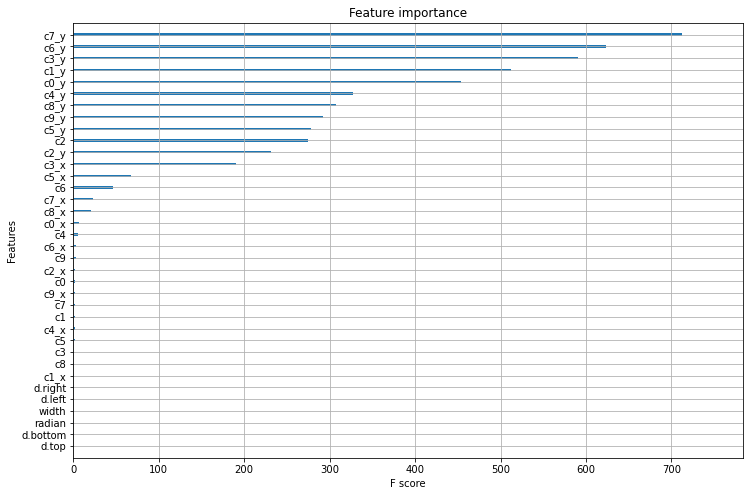

In [18]:
#重要度の可視化
#基本モデル③が使用されてる
#_yがモデル③、_xがモデル②、無印がモデル①
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)
plt.show()

## (6-3) ニューラルネットワーク

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

#モデル作成
model = Sequential()
model.add(Dense(256,input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001),metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\Te





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7936      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 16,490
Trainable params: 16,490
Non-trainable params: 0
_____________________________________________________________

In [20]:
#欠損のある列の削除
tr_x2=tr_x.iloc[:,:30]
va_x2=va_x.iloc[:,:30]

In [21]:
#yデータをワンホットエンコーディング
Y=pd.get_dummies(tr_y)
VA_Y=pd.get_dummies(va_y)

In [22]:
#学習
model.fit(tr_x2.values,Y.values,nb_epoch=80,batch_size=100,verbose=1,validation_data=(va_x2.values,VA_Y.values))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 20466 samples, validate on 1958 samples
Epoch 1/80
20466/20466 [==============================] - 1s 61us/step - loss: 2.2707 - acc: 0.1346 - val_loss: 2.1842 - val_acc: 0.2436
Epoch 2/80
20466/20466 [==============================] - 0s 21us/step - loss: 2.1690 - acc: 0.2077 - val_loss: 2.0753 - val_acc: 0.5700
Epoch 3/80
20466/20466 [==============================] - 0s 19us/step - loss: 2.0654 - acc: 0.3056 - val_loss: 1.9671 - val_acc: 0.8708
Epoch 4/80
20466/20466 [==============================] - 0s 22us/step - loss: 1.9674 - acc: 0.4033 - val_loss: 1.8598 - val_acc: 0.8749
Epoch 5/80
20466/20466 [==============================] - 0s 21us/step - loss: 1.8663 - acc: 0.5063 - val_loss: 1.7512 - val_acc: 0.9515
Epoch 6/80
20466/20466 [==============================] - 0s 21us/step - loss: 1.7623 - acc: 0.5780 - val_loss: 1.6408 - val_acc: 0.9591
Epoch 7/80
20466/20466 [==============================] - 0s 21us/step - loss: 1.6591 - acc: 0.6501 - val_loss: 1.5279 - val_acc:

20466/20466 [==============================] - 0s 20us/step - loss: 0.2418 - acc: 0.9549 - val_loss: 0.1501 - val_acc: 0.9663
Epoch 61/80
20466/20466 [==============================] - 0s 20us/step - loss: 0.2327 - acc: 0.9576 - val_loss: 0.1496 - val_acc: 0.9663
Epoch 62/80
20466/20466 [==============================] - 0s 20us/step - loss: 0.2366 - acc: 0.9558 - val_loss: 0.1491 - val_acc: 0.9663
Epoch 63/80
20466/20466 [==============================] - 0s 21us/step - loss: 0.2295 - acc: 0.9571 - val_loss: 0.1487 - val_acc: 0.9663
Epoch 64/80
20466/20466 [==============================] - 0s 20us/step - loss: 0.2258 - acc: 0.9592 - val_loss: 0.1482 - val_acc: 0.9663
Epoch 65/80
20466/20466 [==============================] - 0s 21us/step - loss: 0.2217 - acc: 0.9589 - val_loss: 0.1479 - val_acc: 0.9663
Epoch 66/80
20466/20466 [==============================] - 0s 20us/step - loss: 0.2191 - acc: 0.9591 - val_loss: 0.1475 - val_acc: 0.9663
Epoch 67/80
20466/20466 [=====================

In [23]:
#データの予測
pred=model.predict(df_test.iloc[:,:30])

In [24]:
#提出データの準備
df_result=df['img']
df_result=pd.concat([df_result,pd.DataFrame(pred,columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])],axis=1)
df_result

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.001543,0.001611,0.000601,0.000284,0.000245,0.992530,0.000159,0.000675,0.002133,0.000219
1,img_10.jpg,0.001542,0.001611,0.000601,0.000284,0.000245,0.992531,0.000159,0.000675,0.002133,0.000219
2,img_100.jpg,0.991982,0.000223,0.001415,0.000660,0.000407,0.001374,0.000608,0.000676,0.000649,0.002005
3,img_1000.jpg,0.016028,0.006391,0.639954,0.008877,0.018883,0.026631,0.010253,0.024845,0.236062,0.012076
4,img_100000.jpg,0.000432,0.000768,0.003547,0.989858,0.002344,0.001344,0.000163,0.001085,0.000149,0.000309
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.000544,0.991026,0.000199,0.000276,0.000186,0.001421,0.000499,0.001535,0.001782,0.002533
79722,img_99995.jpg,0.000437,0.000773,0.003567,0.989793,0.002358,0.001353,0.000165,0.001093,0.000150,0.000311
79723,img_99996.jpg,0.000519,0.000515,0.000777,0.001769,0.991466,0.000816,0.000429,0.002548,0.000831,0.000331
79724,img_99998.jpg,0.000519,0.001048,0.000620,0.000120,0.001305,0.000433,0.992698,0.000540,0.002316,0.000401


In [25]:
#提出データの出力
df_result.to_csv('submission_nn.csv',index=False)

## (6-4) ランダムフォレスト

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10,n_estimators=100,max_leaf_nodes=20)

#学習
model.fit(tr_x.iloc[:,:30],tr_y)
pred=model.predict_proba(va_x.iloc[:,:30])

from sklearn.metrics import log_loss

#validation評価
log_loss(va_y.values,pred)

0.1573220470965028

In [27]:
#予測
pred=model.predict_proba(df_test.iloc[:,:30])

#提出データ準備
df_result=df['img']
df_result=pd.concat([df_result,pd.DataFrame(pred,columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])],axis=1)
df_result

#提出データ出力
df_result.to_csv('submission_rf.csv',index=False)

## (6-5) サポートベクターマシン

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel ='rbf',gamma=0.1,C=0.01,probability=True)

svm.fit(tr_x.iloc[:,:30],tr_y)
pred=svm.predict_proba(va_x.iloc[:,:30])
from sklearn.metrics import log_loss

log_loss(va_y.values,pred)

0.15838869819624318

In [29]:
pred=svm.predict_proba(df_test.iloc[:,:30])

df_result=df['img']
df_result=pd.concat([df_result,pd.DataFrame(pred,columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])],axis=1)
df_result

df_result.to_csv('submission_svm.csv',index=False)